# Customer Segmentation and EDA for Wolt Users

### User Segmentation:
It is the process of splitting the users of an organization into different groups or segments based on user's similarity. There are several ways that can helps us in User segmentation. 

1. Exploratory Data Analysis
2. Clusturing 
3. RFM 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')



import seaborn as sns
df = pd.read_csv('dataset_for_analyst_assignment_20201120.csv')
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

### Number of Registerd users from each Country

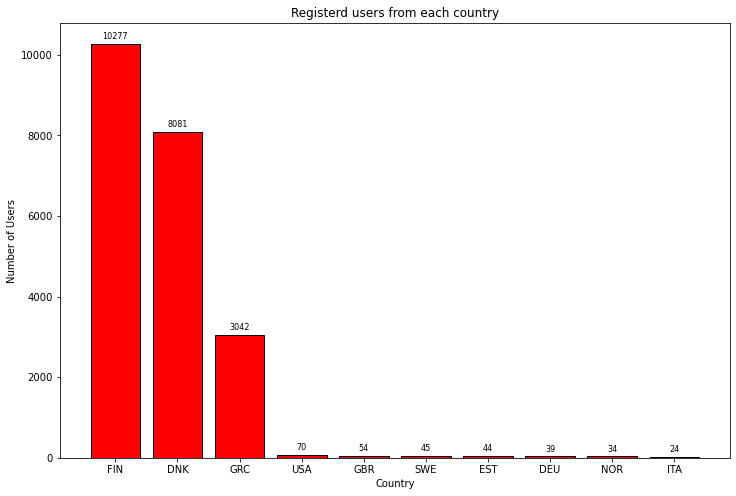

In [3]:
plt.figure(figsize = (12,8))
group = df.groupby('REGISTRATION_COUNTRY')['REGISTRATION_COUNTRY'].count()
group = group.sort_values(ascending = False)[0:10]
bar1 = plt.bar(group.index,group.values, color = 'red', edgecolor = 'black')
plt.bar_label(bar1, padding=3, fontsize=8)
plt.title("Registerd users from each country")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.show()

### Top 10 countries with more spending

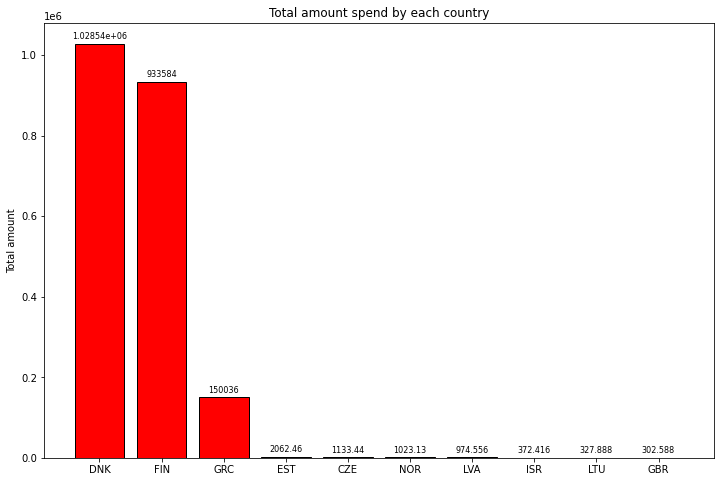

In [4]:
plt.figure(figsize = (12,8))
group = df.groupby('REGISTRATION_COUNTRY')['TOTAL_PURCHASES_EUR'].sum()
group = group.sort_values(ascending = False)[0:10]
bar1 = plt.bar(group.index,group.values, color = 'red', edgecolor = 'black')
plt.bar_label(bar1, padding=3, fontsize=8)
plt.ylabel("Total amount")
plt.title("Total amount spend by each country")
plt.show()

In [5]:
# This cell is just to add dayname from the date present in the dataset. It will help us in EDA base on Days of the week. 
df['REGISTRATION_DATE'] = pd.to_datetime(df['REGISTRATION_DATE']).dt.date
df['Weekday'] = pd.to_datetime(df['REGISTRATION_DATE']).dt.day_name()
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,Weekday
0,2019-09-01,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",Sunday
3,2019-09-01,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday
4,2019-09-01,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday


### Number of registration on each day of September

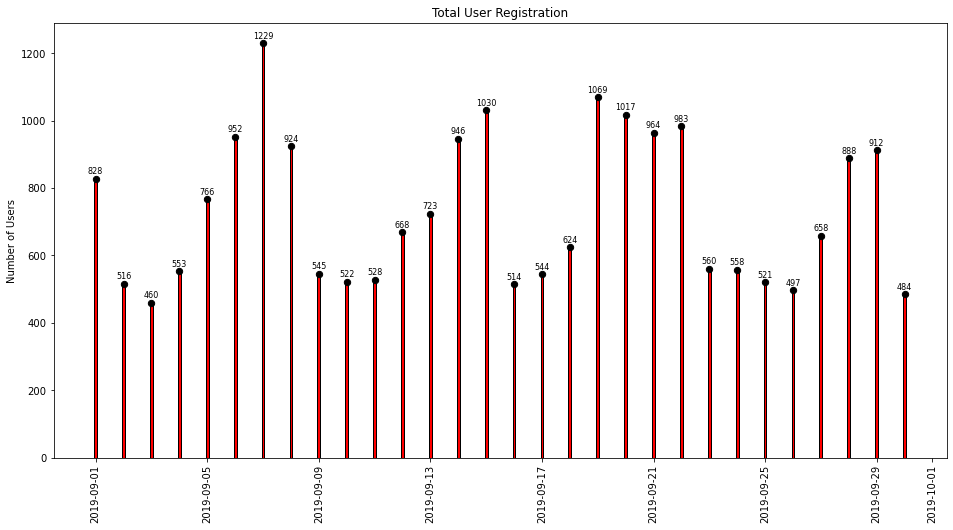

In [6]:
plt.figure(figsize = (16,8))
#ax = df.groupby('REGISTRATION_DATE').size().plot(kind='bar')

group = df.groupby('REGISTRATION_DATE').size()
ax = plt.bar(group.index,group.values, color = 'red', edgecolor = 'black', width = 0.1)
plt.scatter(group.index,group.values, color = 'black', s=40)
plt.bar_label(ax, padding=3, fontsize=8)
plt.title("Total User Registration")
plt.ylabel("Number of Users")
plt.xticks(rotation=90) 
plt.show()

### Total Revenue Generated on each day of the week

In [7]:
# This is another way of adding day to the dataframe
df['Weekday'] = pd.to_datetime(df['REGISTRATION_DATE']).dt.day_name()
df.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE,Weekday
0,2019-09-01,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday
1,2019-09-01,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday
2,2019-09-01,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9...",Sunday
3,2019-09-01,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday
4,2019-09-01,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0...",Sunday


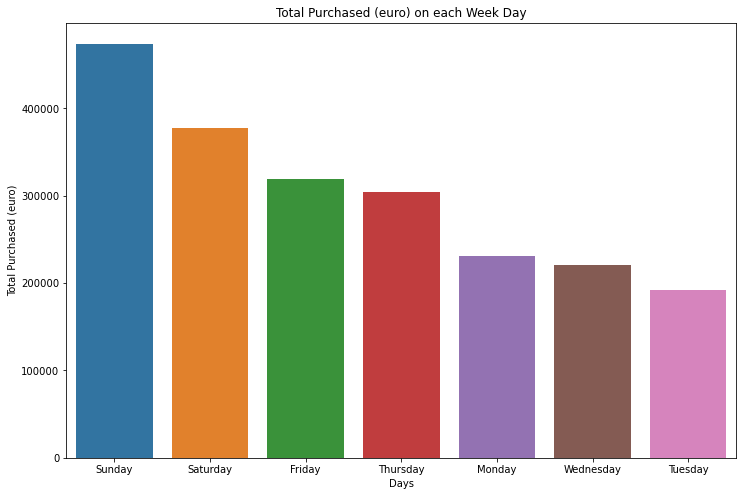

In [8]:
plt.figure(figsize = (12,8))
group = df.groupby('Weekday')['TOTAL_PURCHASES_EUR'].sum()
group = group.sort_values(ascending = False)
sns.barplot(group.index,group.values)
plt.title("Total Purchased (euro) on each Week Day")
plt.bar_label(ax, padding=100, fontsize=8)
plt.xlabel("Days")
plt.ylabel("Total Purchased (euro)")
plt.show()

### Most Prefered Restaurant Types

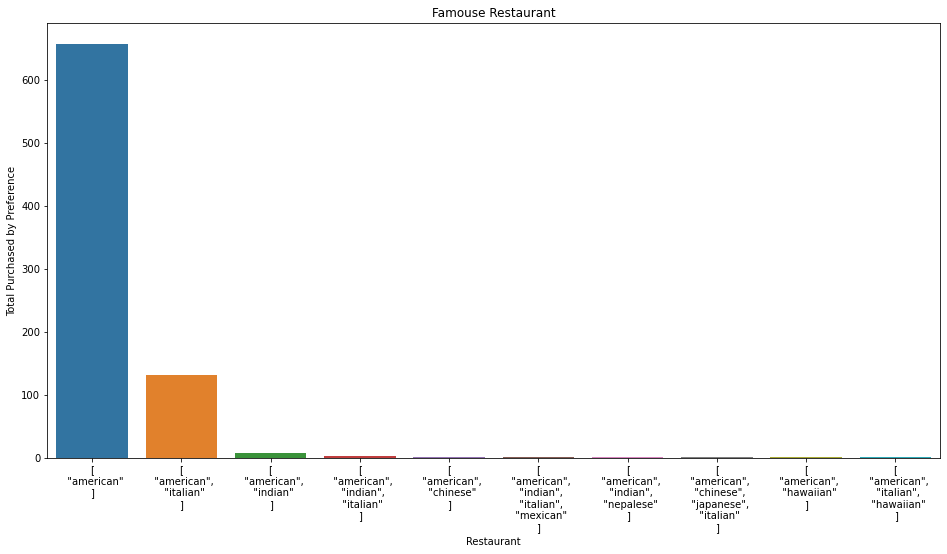

In [9]:
plt.figure(figsize = (16,8))
#df['PREFERRED_RESTAURANT_TYPES'] = df['PREFERRED_RESTAURANT_TYPES'].str[0]
group = df.groupby('PREFERRED_RESTAURANT_TYPES')['PREFERRED_RESTAURANT_TYPES'].count()[0:10]
group = group.sort_values(ascending = False)
sns.barplot(group.index,group.values)
plt.title("Famouse Restaurant")
plt.xlabel("Restaurant")
plt.ylabel("Total Purchased by Preference")
plt.show()

### Prefered Device Type

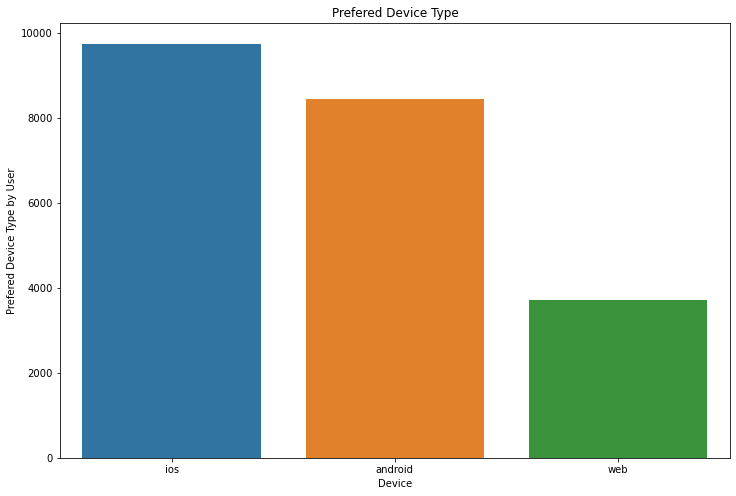

In [10]:
plt.figure(figsize = (12,8))
group = df.groupby('PREFERRED_DEVICE')['PREFERRED_DEVICE'].count()[0:10]
group = group.sort_values(ascending = False)

sns.barplot(group.index,group.values)
plt.title("Prefered Device Type")
plt.xlabel("Device")
plt.ylabel("Prefered Device Type by User")
plt.show()

### Number of Registration on Each day of the week

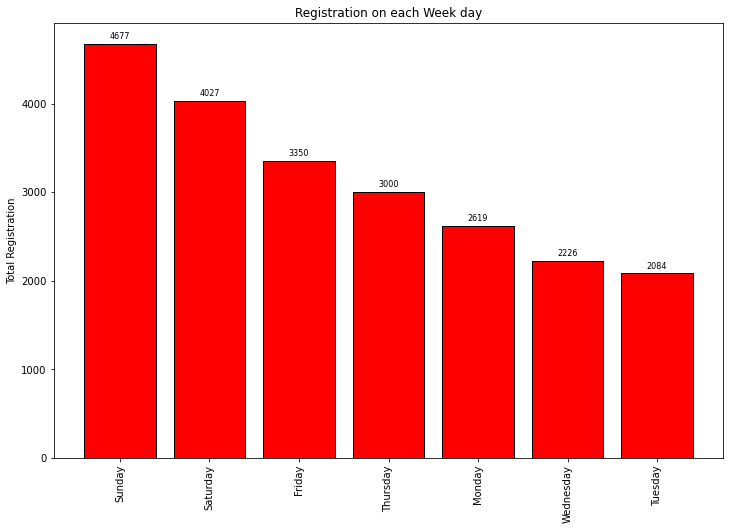

In [11]:
plt.figure(figsize = (12,8))
group = df.groupby('Weekday')['Weekday'].count()
group = group.sort_values(ascending = False)
ax = plt.bar(group.index,group.values, color = 'red', edgecolor = 'black')
plt.bar_label(ax, padding=3, fontsize=8)
plt.xticks(rotation=90) 
plt.title("Registration on each Week day")
plt.ylabel("Total Registration")
plt.show()

### User Segmentation based on Purchase Amount

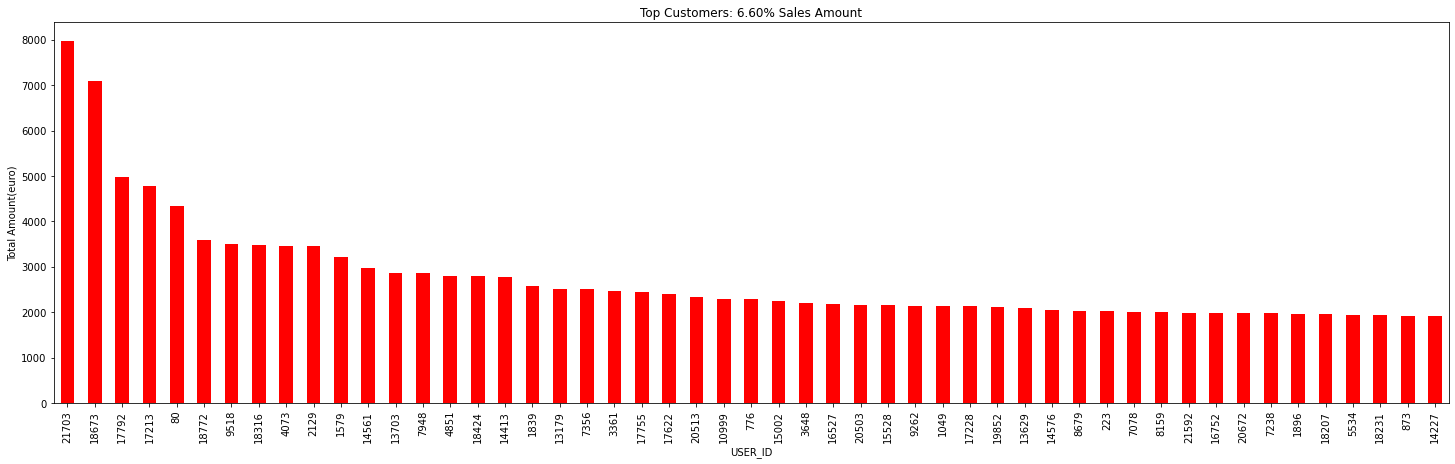

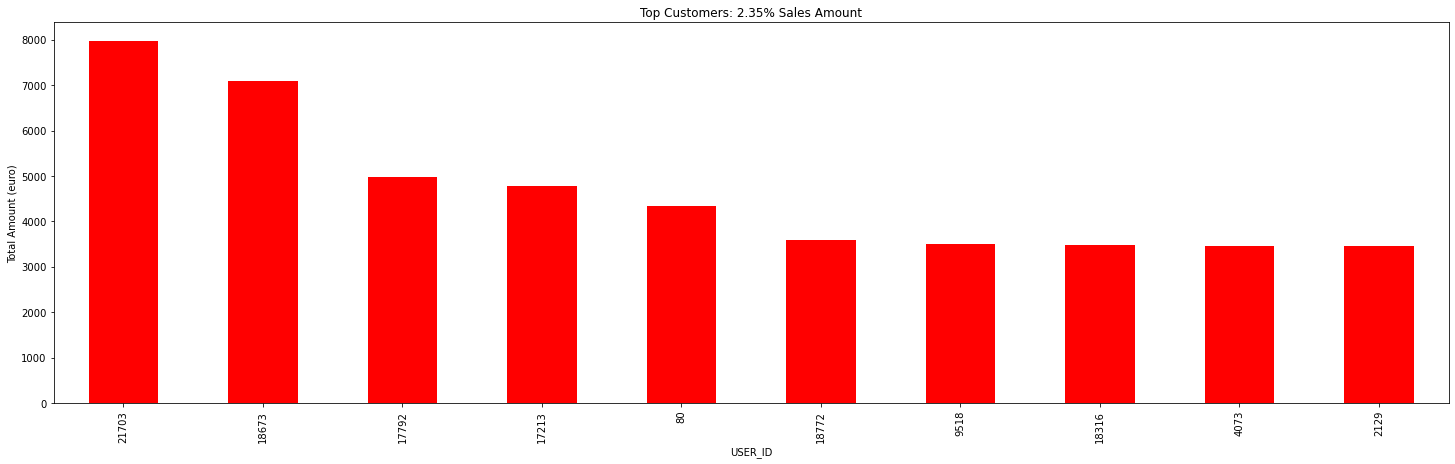

In [12]:
import numpy as np
fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((df.groupby(["USER_ID"]).TOTAL_PURCHASES_EUR.sum().sort_values(ascending = False)[:51].sum()/df.groupby(["USER_ID"]).\
                          TOTAL_PURCHASES_EUR.sum().sort_values(ascending = False).sum()) * 100, 2)

g = df.groupby(["USER_ID"]).TOTAL_PURCHASES_EUR.sum().sort_values(ascending = False)[:51].\
    plot(kind='bar',color = 'r', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales), ylabel = "Total Amount(euro)", fontsize = 10)

fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((df.groupby(["USER_ID"]).TOTAL_PURCHASES_EUR.sum().sort_values(ascending = False)[:11].sum()/df.groupby(["USER_ID"]).\
                          TOTAL_PURCHASES_EUR.sum().sort_values(ascending = False).sum()) * 100, 2)

g = df.groupby(["USER_ID"]).TOTAL_PURCHASES_EUR.sum().sort_values(ascending = False)[:10].\
    plot(kind='bar',color = 'r', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales), ylabel = 'Total Amount (euro)')


### Segmentation based on Frequency of Purchasing

The Cluster Centers is
[[ 3.4427736 ]
 [96.71875   ]
 [25.40890008]]



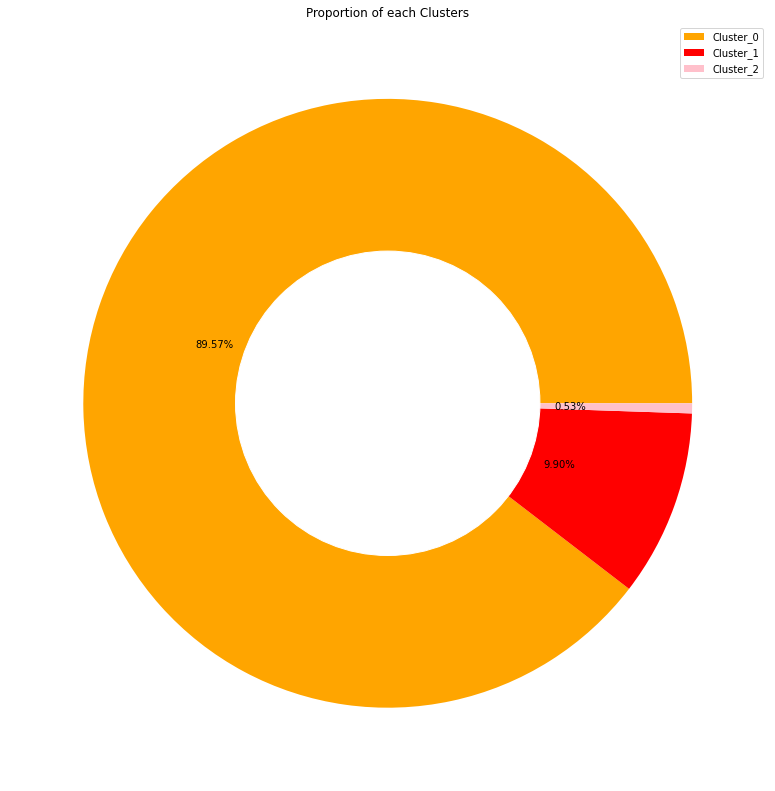

In [13]:
from sklearn.cluster import KMeans

dfNew = df[df['PURCHASE_COUNT']>0]

dfFreq = pd.DataFrame(dfNew, columns=['PURCHASE_COUNT'])
kmeans = KMeans(n_clusters=3, random_state = 0)
y = kmeans.fit_predict(dfFreq[['PURCHASE_COUNT']])
print("The Cluster Centers is")
print(kmeans.cluster_centers_)
print()

labels = ['Cluster_0', 'Cluster_1', 'Cluster_2']
dfFreq['Cluster'] = y
plt.figure(figsize = (14,14))
colors = ['orange', 'red', 'pink']

plt.pie(dfFreq['Cluster'].value_counts(), autopct='%1.2f%%', colors = colors)
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.legend(labels, loc="best")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Proportion of each Clusters")
plt.show()

In [14]:
dfFreq['Cluster'].value_counts()

0    10773
2     1191
1       64
Name: Cluster, dtype: int64

Cluster 0 shows the user who never or order for very few times. Similaryly, cluster 1 and 2 shows the users are ordering repeatedly and they are the important segment for the Wold Business. Though their percentage is quite low but still they are of great importance. 

The Cluster Centers is
[[  0.94332487]
 [ 28.52240896]
 [ 10.13340892]
 [175.1       ]
 [ 68.76923077]]



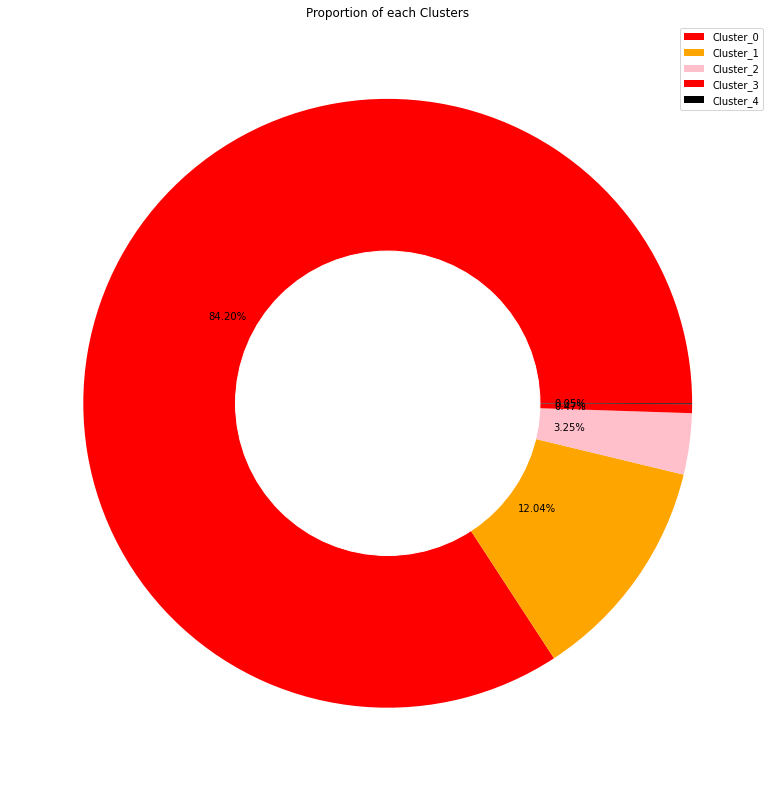

In [15]:

dfFreq = pd.DataFrame(df, columns=['PURCHASE_COUNT'])
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(dfFreq[['PURCHASE_COUNT']])
dfFreq['Cluster'] = y

print("The Cluster Centers is")
print(kmeans.cluster_centers_)
print()

labels = ['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']

plt.figure(figsize = (14,14))
colors = ['red', 'orange', 'pink' ,'red', 'black']


plt.pie(dfFreq['Cluster'].value_counts(), autopct='%1.2f%%', colors = colors)
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend(labels, loc="best")

plt.title("Proportion of each Clusters")
plt.show()

### Segmentation based on Distance

The cluster centers are
[[10.73666065]
 [ 3.71539768]
 [ 1.26147819]
 [ 8.33377162]
 [ 6.03351196]]



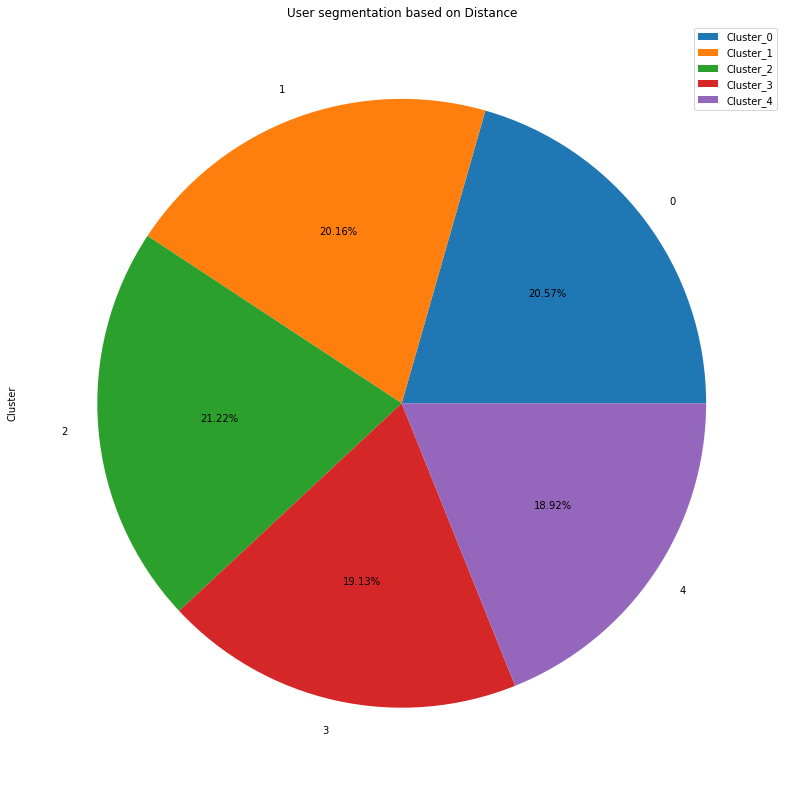

In [16]:
dfFreq = pd.DataFrame(df, columns=['AVERAGE_DELIVERY_DISTANCE_KMS'])
dfFreq = dfFreq.dropna()
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(dfFreq[['AVERAGE_DELIVERY_DISTANCE_KMS']])

labels = ['Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4']


print("The cluster centers are")
print(kmeans.cluster_centers_)
print()
dfFreq['Cluster'] = y
plt.figure(figsize = (14,14))
dfFreq.groupby('Cluster')['Cluster'].count().plot(kind = 'pie', autopct='%1.2f%%')
plt.title("User segmentation based on Distance")
plt.legend(labels, loc="best")

plt.show()

### purchase Time based Classification

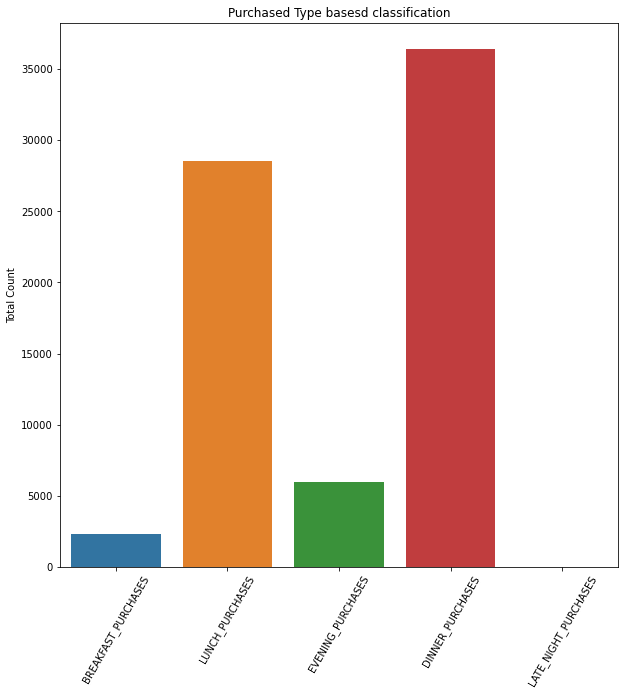

In [17]:
plt.figure(figsize = (10,10))
Y = [df['BREAKFAST_PURCHASES'].sum(), df['LUNCH_PURCHASES'].sum(),df['EVENING_PURCHASES'].sum(),df['DINNER_PURCHASES'].sum(),df['LATE_NIGHT_PURCHASES'].sum()]
X = ['BREAKFAST_PURCHASES', 'LUNCH_PURCHASES', 'EVENING_PURCHASES', 'DINNER_PURCHASES', 'LATE_NIGHT_PURCHASES']
sns.barplot(X,Y)
plt.xticks(rotation=60) 
plt.title("Purchased Type basesd classification")
plt.ylabel("Total Count")
plt.show()